#  Bagging and Pasting

In [3]:
import numpy as np
from helpers.MathFunctions import mode

class BaggedModels:
    def __init__(self, paste=False):
        self.paste = paste
    
    def __call__(self, instances, take_mode=False):
        return self.predict(instances, take_mode=take_mode)
    
    def fit(self, X, y, models):
        self.models = models
        num_models = len(models)
        train = np.hstack((X, np.expand_dims(y, axis=1)))
        np.random.shuffle(train)
        X, y = train[:,:-1], train[:,-1]
        indices = np.random.choice(range(X.shape[0]), size=(num_models, int(X.shape[0]/num_models)), replace=not self.paste)
        Xs = [X[indices[i]] for i in range(indices.shape[0])]
        ys = [y[indices[i]] for i in range(indices.shape[0])]
        for i in range(num_models):
            models[i].fit(Xs[i], ys[i])
    
    def predict(self, instances, take_mode=False):
        preds = []
        for model in self.models:
            preds.append(model.predict(instances))
        preds = np.array(preds).T
        if take_mode:
            return np.apply_along_axis(mode, 1, preds)
        return preds

## Bagging

In [6]:
from helpers.GetDatasets import classification_split
X_train, X_test, y_train, y_test = classification_split(n_samples=1000, n_classes=3, n_clusters_per_class=1)

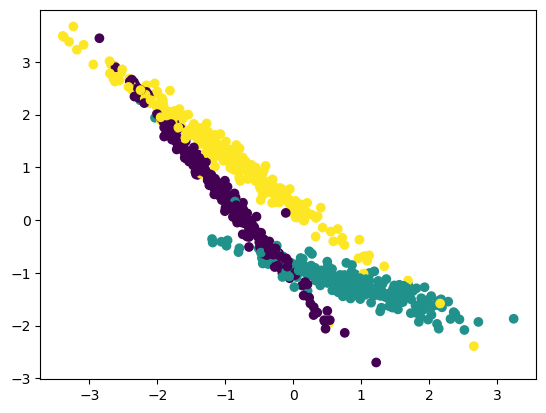

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

In [8]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC

In [16]:
models = [KNN(), DT(), LR(), SVC()]
model = BaggedModels()
model.fit(X_train, y_train, models)
preds = model(X_test, take_mode=True)

In [17]:
from helpers.Evaluation import classification_stats
metrics = classification_stats(preds, y_test, binary=False)
metrics

{'acc': 0.9}

## Pasting

In [20]:
model = BaggedModels(paste=True)
model.fit(X_train, y_train, models)
preds = model(X_test, take_mode=True)

In [21]:
metrics = classification_stats(preds, y_test, binary=False)
metrics

{'acc': 0.885}

In [22]:
for model in models:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    metrics = classification_stats(preds, y_test, binary=False)
    print(f"{model}:, {metrics}")

KNeighborsClassifier():, {'acc': 0.905}
DecisionTreeClassifier():, {'acc': 0.905}
LogisticRegression():, {'acc': 0.88}
SVC():, {'acc': 0.895}
